In [112]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [137]:
#Plotting Functions

def plot_histograms(data):
    """
    Plots histograms for all variables in the dataset.

    Parameters:
        data (DataFrame): Input DataFrame.
    """
    plt.figure(figsize=(12, 8))
    palette = sns.color_palette("Reds", len(data.columns))
    for i, col in enumerate(data.columns, start=1):
        plt.subplot(3, 2, i)
        sns.histplot(data[col], color=palette[i-1], kde=True)
        plt.title(f'Histogram of {col}', fontsize=15)
    plt.tight_layout()
    plt.savefig("histogram.png", dpi=144)
    plt.show()
    return

def plot_pair_plot(df):
    """
    Plot a pair plot to show the relationship between all the columns in the dataframe.

    """
    plt.figure(dpi=144)
    sns.pairplot(df)
    plt.savefig('Pair plot.png',dpi=144)
    plt.show()
    return

def plot_scatter_graph(df, x_column, y_column):
    """
    Scatter graph of 'Time on Website' vs 'Yearly Amount Spent.

    """
    plt.figure(dpi=144)
    plt.scatter(df[x_column], df[y_column], c='blue', alpha=0.6)
    plt.title(f'{y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.savefig('scatter.png',dpi=144)
    plt.show()
    return

def plot_pie_chart(df):
    """
    Pie chart to show the distribution of gender.

    """
    gender_counts = df['Gender'].value_counts()
    plt.figure(figsize=(7, 7))
    gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
    plt.title('Gender Distribution')
    plt.savefig('pie.png', dpi=144)
    plt.show()
    return

#Fitting Functions
def Linear_fitting(X,y):
    """
    Perform linear regression on the input features and target variable.

    Parameters:
    X (DataFrame): Input DataFrame containing the features.
    y (Series): Target variable.

    Returns:
    coef_ (array-like): Coefficients of the linear model.
    score (float): R-squared score of the linear model.
    """
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    return lm.coef_, lm.score(X, y)

def plot_linear_confidence_interval(X, y, coef_):
    """
    Plot the actual vs predicted 'Yearly Amount Spent' with confidence interval shaded in gray.

    Parameters:
    X (DataFrame): Input DataFrame containing the features.
    y (Series): Target variable.
    coef_ (array-like): Coefficients of the linear model.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X)

    residuals = y - y_pred
    confidence_interval = 1.96 * np.std(residuals)

    plt.figure(figsize=(12, 8))

    sns.scatterplot(x=y, y=y_pred, color='blue', alpha=0.6)
    plt.fill_between([y.min(), y.max()], [y.min()-confidence_interval, y.max()-confidence_interval],
                     [y.min()+confidence_interval, y.max()+confidence_interval], color='gray', alpha=0.3)

    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')

    plt.title('Actual vs Predicted Yearly Amount Spent with Confidence Interval')
    plt.xlabel('Actual Yearly Amount Spent')
    plt.ylabel('Predicted Yearly Amount Spent')
    plt.grid(True)
    plt.savefig("Fitting.png",dpi=144)
    plt.show()
    return

#Clustering Functions
def plot_elbow_method(wcss):
    """
    Plot the elbow graph to determine the optimal number of clusters.

    Parameters:
    - wcss (list): List of within-cluster sum of squares values for different number of clusters.

    Returns:
    - None: Displays the elbow graph.
    """
    plt.plot(range(1, 11), wcss)
    plt.title("The Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS Values")
    plt.savefig("elbow.png", dpi=144)
    plt.show()
    return

def calculate_silhouette_score(X):
    """
    Calculates and prints the Silhouette Score for different numbers of clusters.

    Parameters:
        data (DataFrame): Input data for clustering.
    """
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    best_score = max(silhouette_scores)
    best_n_clusters = silhouette_scores.index(best_score) + 2
    print(f"The best silhouette score is {best_score} for n_clusters = {best_n_clusters}")

def kmeans_clustering(df, features, n_clusters=5):
    """
    Perform K-means clustering on the given DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data for clustering.
    - features (list): List of feature columns to use for clustering.
    - n_clusters (int): Number of clusters to form (default is 5).

    Returns:
    - DataFrame: Original DataFrame with an additional 'Cluster' column indicating the cluster each data point belongs to.
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=n_clusters)

    # Fit and predict clusters
    predicted = km.fit_predict(df[features])

    # Add 'Cluster' column to the DataFrame
    df['Cluster'] = predicted

    # Create separate DataFrames for each cluster
    clusters = [df[df.Cluster == i] for i in range(n_clusters)]

    return df, clusters

def plot_clusters(df, km):
    """
    Plot the clusters and centroids using scatter plots.

    Parameters:
    - df (DataFrame): Input DataFrame containing the clustered data.
    - km (KMeans): Fitted KMeans model.

    Returns:
    - None: Displays the scatter plot of clusters.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plots for each cluster
    for i in range(km.n_clusters):
        cluster = df[df['Cluster'] == i]
        plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                    s=80, label=f"Cluster-{i+1}")

    # Scatter plot for centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                color='black', marker='x', s=100, label='Centroid')

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Clustering of Mall Customers')
    plt.legend()
    plt.savefig("cluster.png", dpi=144)
    plt.show()
    return



In [145]:
# Read Data from csv file
#link: https://www.kaggle.com/datasets/srolka/ecommerce-customers
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [146]:
# Explore the Dataset

print("Number of rows and columns: ", df.shape)
print("\n\nColumns data type: \n\n", df.dtypes)

Number of rows and columns:  (500, 8)


Columns data type: 

 Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object


In [148]:
df = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
#ignoring Email, Address and Avatar columns

In [149]:
#Counting the number of null values

null_values = df.isnull().sum()
print("Number of null values in every column: \n\n", null_values)
#no null values

Number of null values in every column: 

 Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [151]:
#Describe

print("Statistical Analysis: \n\n")
df.describe()

Statistical Analysis: 




,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [152]:
#Skewness and Kurtosis

print("\nSkewness: \n", df.skew())
print("\nkurtosis: \n", df.kurtosis())


Skewness: 
 Avg. Session Length    -0.032175
Time on App            -0.089121
Time on Website         0.012142
Length of Membership   -0.106608
Yearly Amount Spent     0.034790
dtype: float64

kurtosis: 
 Avg. Session Length     0.011862
Time on App             0.125081
Time on Website        -0.098287
Length of Membership    0.349010
Yearly Amount Spent     0.463976
dtype: float64


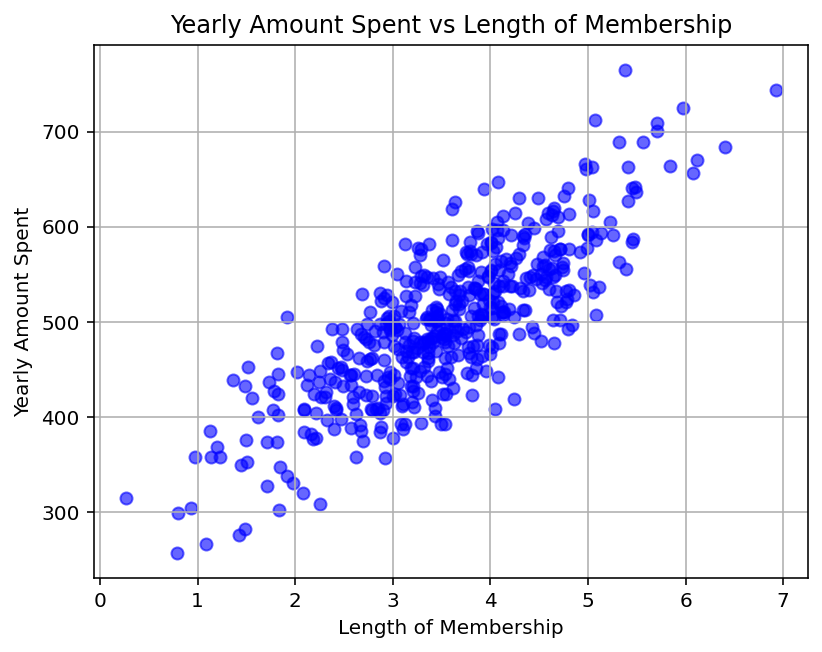

In [155]:
plot_scatter_graph(df, 'Length of Membership', 'Yearly Amount Spent')

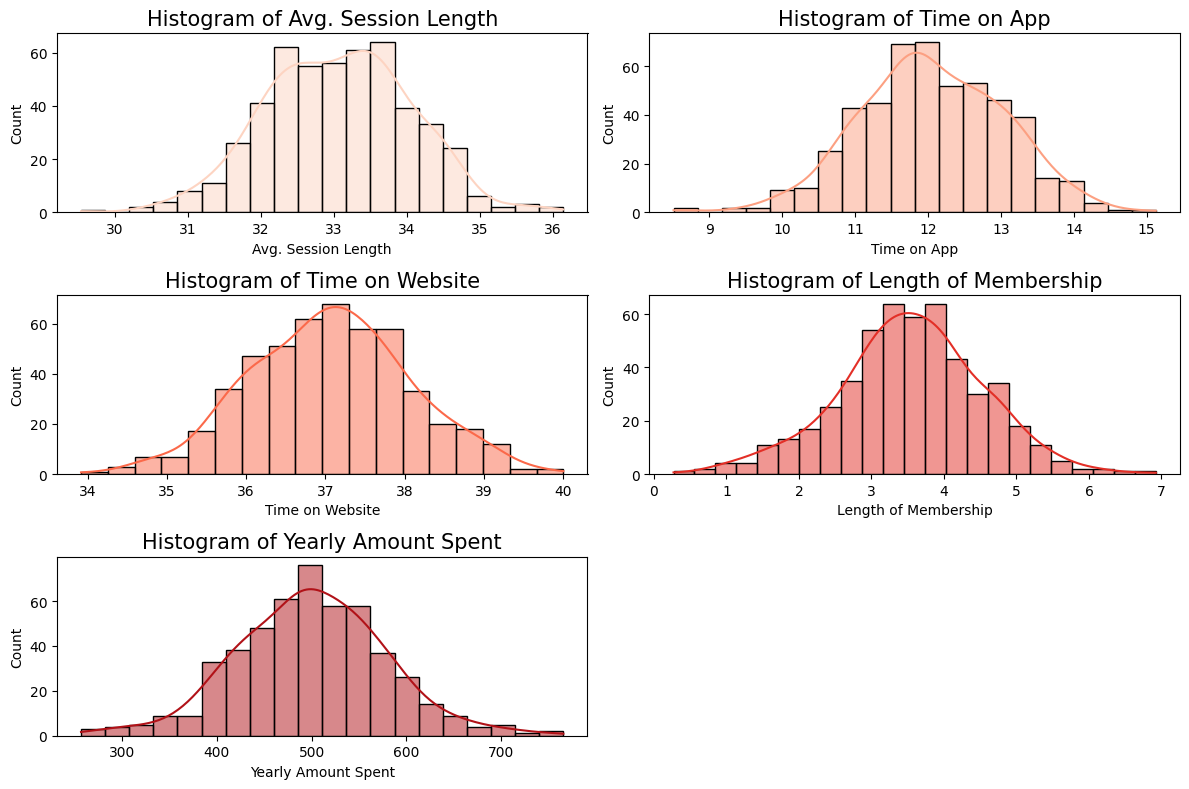

In [153]:
plot_histograms(df)

<Figure size 921.6x691.2 with 0 Axes>

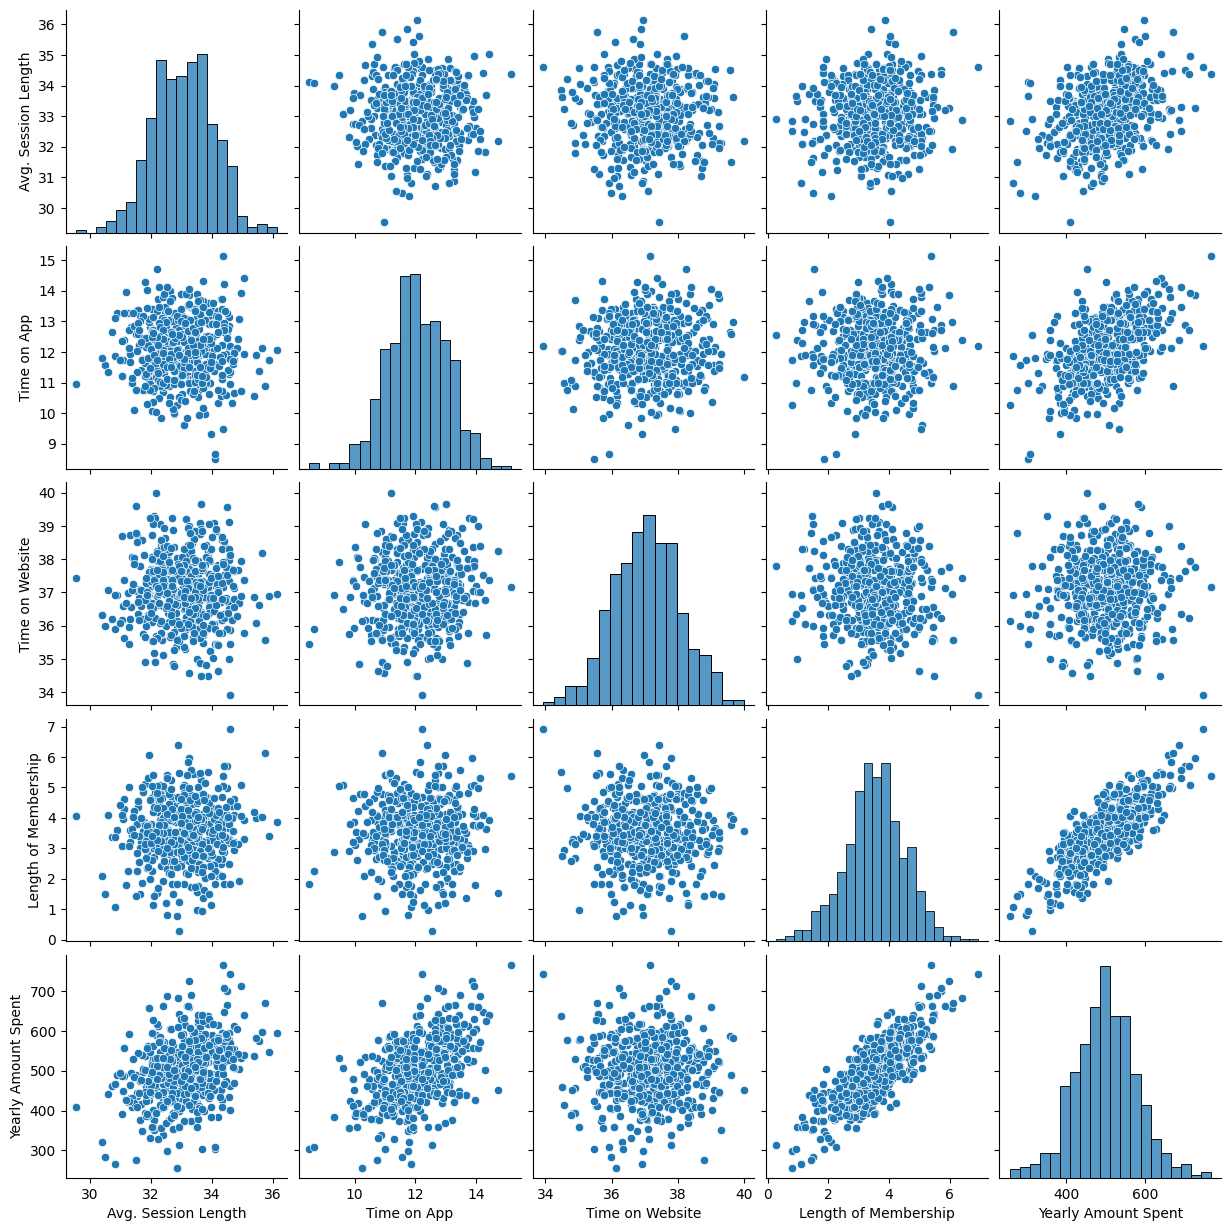

In [154]:
plot_pair_plot(df)

Co-efficient: [25.72425621 38.59713548  0.45914788 61.67473243]
Score: 0.9842821675307221


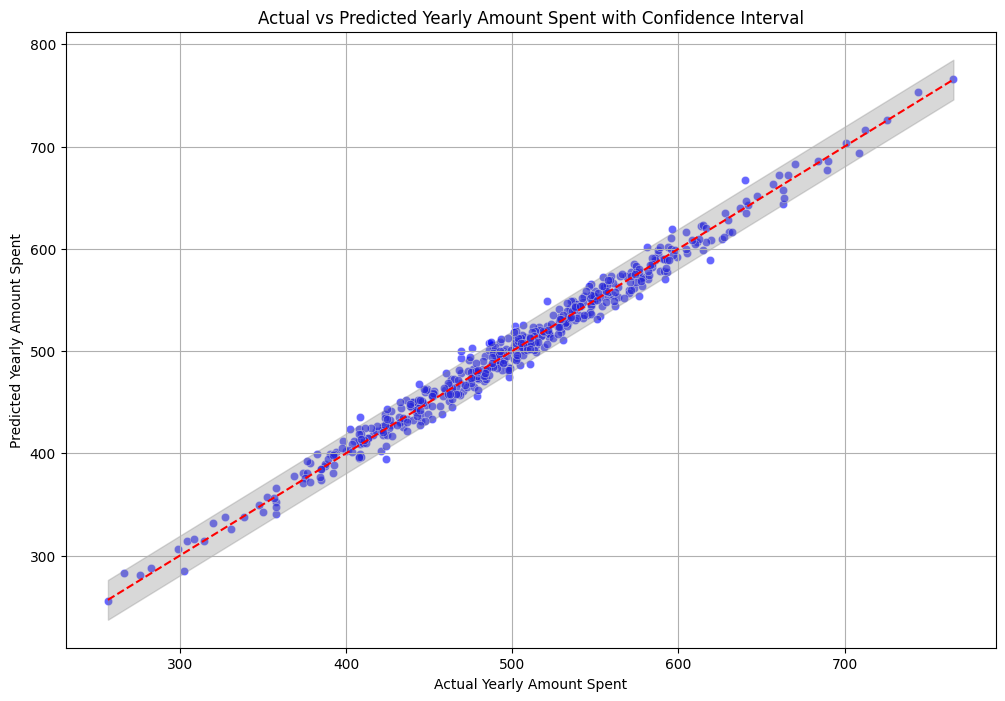

In [156]:
#Fitting
# Features and target variable
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Perform linear fitting
coef_, score = Linear_fitting(X, y)
print("Co-efficient:", coef_)
print("Score:", score)

# Plot actual vs predicted Yearly Amount Spent with confidence interval shaded in gray
plot_linear_confidence_interval(X, y, coef_)

**Clustering**

In [133]:
# Load the Ecommerce Customers dataset
# Link: https://www.kaggle.com/datasets/kandij/mall-customers
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [134]:
# Explore the Dataset

print("Number of rows and columns: ", df.shape)
print("\n\nColumns data type: \n\n", df.dtypes)

Number of rows and columns:  (200, 5)


Columns data type: 

 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


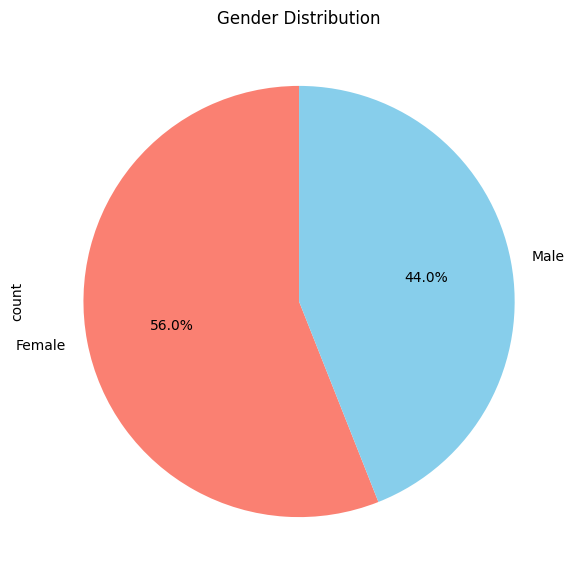

In [138]:
plot_pie_chart(df)

In [140]:
#only taking annual income and spending score
X= df.iloc[:, [3,4]].values

In [141]:
wcss= []

for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

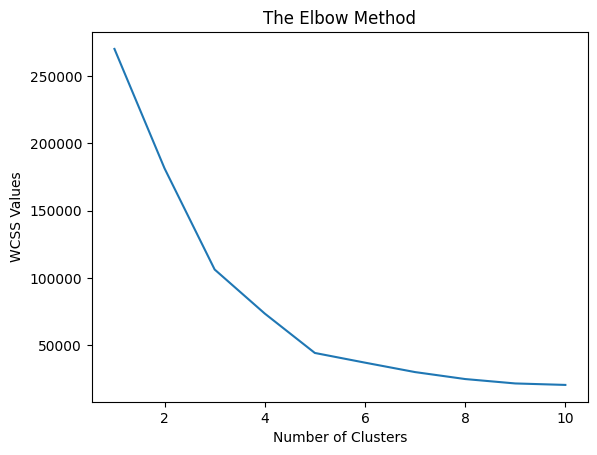

In [142]:
plot_elbow_method(wcss)

In [143]:
calculate_silhouette_score(X)

For n_clusters = 2, the average silhouette score is: 0.2968969162503008
For n_clusters = 3, the average silhouette score is: 0.46761358158775435
For n_clusters = 4, the average silhouette score is: 0.4931963109249047
For n_clusters = 5, the average silhouette score is: 0.553931997444648
For n_clusters = 6, the average silhouette score is: 0.53976103063432
For n_clusters = 7, the average silhouette score is: 0.5264283703685728
For n_clusters = 8, the average silhouette score is: 0.45827056882053113
For n_clusters = 9, the average silhouette score is: 0.4553729779390266
For n_clusters = 10, the average silhouette score is: 0.45925273534781125
The best silhouette score is 0.553931997444648 for n_clusters = 5


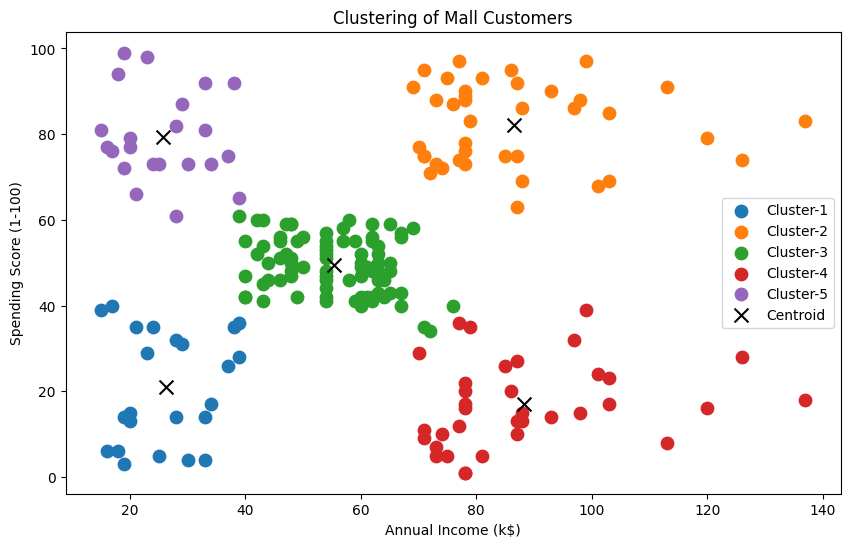

In [144]:
# Features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Perform K-means clustering
df_clustered, clusters = kmeans_clustering(df, features)
km = KMeans(n_clusters=5)
predicted = km.fit_predict(df_clustered[features])
df_clustered['Cluster'] = predicted

# Plot clusters
plot_clusters(df_clustered, km)